In [45]:
#!/usr/bin/env python
# coding: utf-8

#import anchor
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams['font.size'] = 16

The antenna receivers consist of an 
array of 25 antennas on a grid with equal spacing of 100 m. 

In [46]:
x = np.array([-200, -100, 0, 100, 200])
y = np.array([-200, -100, 0, 100, 200])
xx, yy = np.meshgrid(x, y, sparse=False)

In [64]:
c=1
for i in range(len(x)):
    for j in range(len(y)):
        print(c, float(x[i]), float(y[j]), 0.)
        c+=1

1 -200.0 -200.0 0.0
2 -200.0 -100.0 0.0
3 -200.0 0.0 0.0
4 -200.0 100.0 0.0
5 -200.0 200.0 0.0
6 -100.0 -200.0 0.0
7 -100.0 -100.0 0.0
8 -100.0 0.0 0.0
9 -100.0 100.0 0.0
10 -100.0 200.0 0.0
11 0.0 -200.0 0.0
12 0.0 -100.0 0.0
13 0.0 0.0 0.0
14 0.0 100.0 0.0
15 0.0 200.0 0.0
16 100.0 -200.0 0.0
17 100.0 -100.0 0.0
18 100.0 0.0 0.0
19 100.0 100.0 0.0
20 100.0 200.0 0.0
21 200.0 -200.0 0.0
22 200.0 -100.0 0.0
23 200.0 0.0 0.0
24 200.0 100.0 0.0
25 200.0 200.0 0.0


5 5


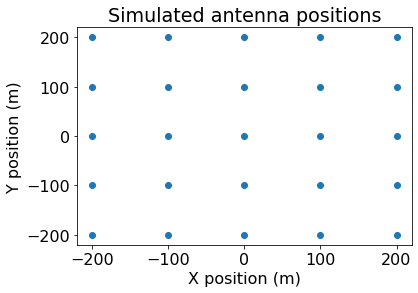

In [48]:
plt.title("Simulated antenna positions")
plt.scatter(xx,yy)
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")
print(len(xx), len(yy))

In [49]:
waveforms= np.load("ri_fig1/waveforms.npy")

Each antenna receives a time-domain signal (a waveform of $\vec{E}(t)$), corresponding to one of the $S_i(t)$ in Eq. 1. The antenna poisition is the $i-$th posiition. 

You can see that the waveforms are shifted by their casual time delays. If you open the .sry file, you can find how much they've been shifted in a table listing the antenna poisitions and their time delays.

If you plot all three compoennts of the electric field, you'll see that the $E$-field (which is generated by the Lorentz force predominately) is mostly in the $y$-direction. (The antenna in the center, wi has a significant $E_z$ component). In principle, you should calculate the vector sum to get the total power (which is $\propto S_i(t)^2$).

Text(0, 0.5, 'Ex')

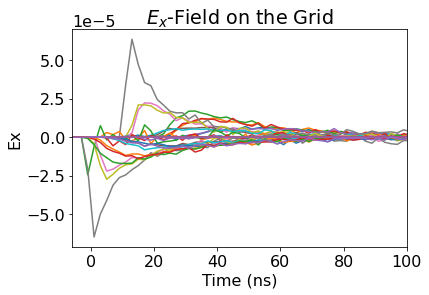

In [68]:
for i in range(25):
    plt.plot(waveforms['t'][i], waveforms['Ex'][i], label=i+1)
plt.xlim(-6,100)
#plt.ylim(-0.0002, 0.0002)
plt.title("$E_{x}$-Field on the Grid")
plt.xlabel("Time (ns)")
plt.ylabel("Ex")
#plt.legend()

Text(0, 0.5, 'Ey')

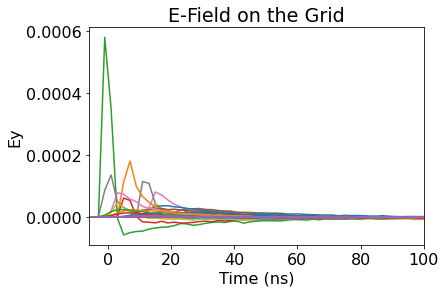

In [69]:
for i in range(25):
    plt.plot(waveforms['t'][i], waveforms['Ey'][i], label=i+1)
plt.xlim(-6,100)
#plt.ylim(-0.0002, 0.0002)
plt.title("E-Field on the Grid")
plt.xlabel("Time (ns)")
plt.ylabel("Ey")
#plt.legend()

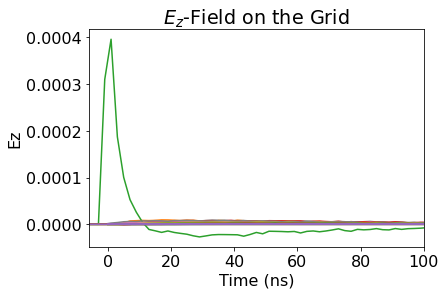

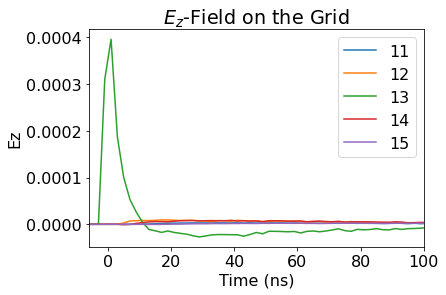

In [70]:
plt.figure()
for i in range(25):
    plt.plot(waveforms['t'][i], waveforms['Ez'][i], label=i+1)
plt.xlim(-6,100)
#plt.ylim(-0.0002, 0.0002)
plt.title("$E_{z}$-Field on the Grid")
plt.xlabel("Time (ns)")
plt.ylabel("Ez")
#plt.legend()

plt.figure()
for i in range(10,15):
    plt.plot(waveforms['t'][i], waveforms['Ez'][i], label=i+1)
plt.xlim(-6,100)
#plt.ylim(-0.0002, 0.0002)
plt.title("$E_{z}$-Field on the Grid")
plt.xlabel("Time (ns)")
plt.ylabel("Ez")
plt.legend()

The next step is to set up a 3D grid, where each point corresponds to the $j$-th position. Calculate the distance between each antenna 
and every point in the grid $d_{ij}$. 

That will tell you by how much 
to shift the waveforms:  $\Delta_{ij} = d_{ij}  n_{j} / c$. Evaluate the index of refraction
at the $j$-th position, point in the 3D grid you're evaluating. This should in principle be identical to the values in the sry file.

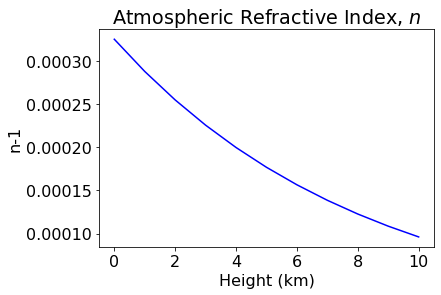

In [59]:
#atmospheric refractive index
# 
a = 325*10**-6
b = 0.1218 #1/km
def n(z):
    # z corresponds to the height of the antenna array in km
    return 1+a*np.exp(-b*z)

height = np.linspace(0,10,11)
ARI = n(height)
plt.xlabel("Height (km)")
plt.ylabel("n-1")

plt.title("Atmospheric Refractive Index, $n$")
plt.plot(height, ARI-1., linestyle="-", color = "Blue")